In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten, Reshape
import matplotlib.pyplot as plt

In [2]:
inputs = []
targets = []

In [3]:
for i in range(52):
    with open('dataset.json', 'r') as fp:
        data = json.load(fp)
        inputs = inputs + data['roi']
        targets = targets + data['peak']

In [4]:
inputs = np.array(inputs)
targets = np.array(targets)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.1)
X_train, X_validation, y_train, y_validation = train_test_split(inputs, targets, test_size=0.1)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]

In [6]:
X_train.shape
input_shape=X_train[0].shape
input_shape

(20, 1)

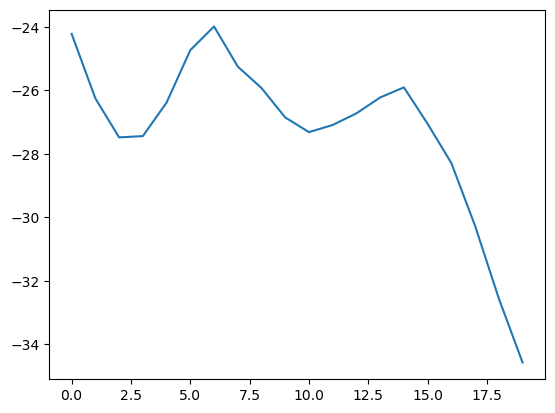

In [7]:
plt.plot(X_train[50])

In [8]:
model = Sequential()

model.add(Conv1D(filters=20, kernel_size=3, activation='relu', input_shape=input_shape))

model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))

model.add(Conv1D(filters=8, kernel_size=3, activation='relu'))

model.add(Flatten())

model.add(Dense(16, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18, 20)            80        
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 16)            976       
                                                                 
 conv1d_2 (Conv1D)           (None, 14, 8)             392       
                                                                 
 flatten (Flatten)           (None, 112)               0         
                                                                 
 dense (Dense)               (None, 16)                1808      
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 3

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=50, batch_size=32)

Epoch 1/50
1492/1492 [==============================] - 3s 2ms/step - loss: 0.4286 - binary_accuracy: 0.8228 - val_loss: 0.2777 - val_binary_accuracy: 0.8918
Epoch 2/50
1492/1492 [==============================] - 2s 1ms/step - loss: 0.1978 - binary_accuracy: 0.9228 - val_loss: 0.1604 - val_binary_accuracy: 0.9391
Epoch 3/50
1492/1492 [==============================] - 2s 1ms/step - loss: 0.1602 - binary_accuracy: 0.9364 - val_loss: 0.1373 - val_binary_accuracy: 0.9474
Epoch 4/50
1492/1492 [==============================] - 2s 1ms/step - loss: 0.1499 - binary_accuracy: 0.9403 - val_loss: 0.1327 - val_binary_accuracy: 0.9434
Epoch 5/50
1492/1492 [==============================] - 2s 1ms/step - loss: 0.1445 - binary_accuracy: 0.9409 - val_loss: 0.1349 - val_binary_accuracy: 0.9442
Epoch 6/50
1492/1492 [==============================] - 2s 1ms/step - loss: 0.1401 - binary_accuracy: 0.9433 - val_loss: 0.1253 - val_binary_accuracy: 0.9491
Epoch 7/50
1492/1492 [==============================

In [12]:
prediction = model.predict(X_test)

166/166 [==============================] - 0s 600us/step


[0.99619627]


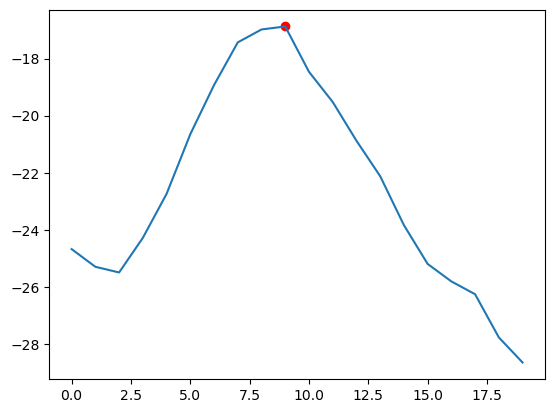

In [17]:
plt.plot(X_test[61])
plt.scatter(np.argmax(X_test[61]), max(X_test[61]), c='r')
print(prediction[61])

[0.00437315]


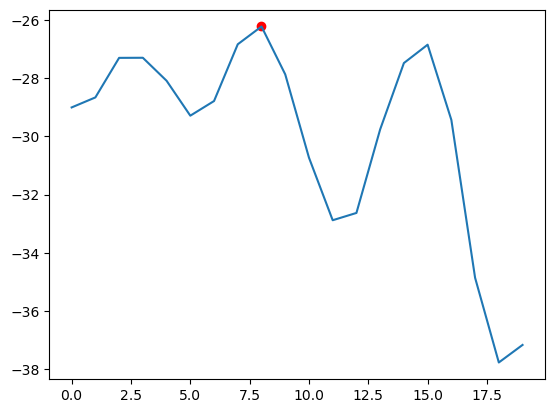

In [14]:
plt.plot(X_test[62])
plt.scatter(np.argmax(X_test[62]), max(X_test[62]), c='r')
print(prediction[62])

In [18]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets
